In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing the data
data = pd.read_excel(open('C:/users/arjhu_000/dropbox/OSU/Grad Materials/Spring 2017/CSE 5544/Midterm/SchichDataS1_FB.xlsx','rb'), sheetname='FB')

In [2]:
import math

#calculating the distances

data['BLocLong'] = data['BLocLong'].astype(float)
data['BLocLat']= data['BLocLat'].astype(float)
data['DLocLong']= data['DLocLong'].astype(float)
data['DLocLat']= data['DLocLat'].astype(float)

data['BLocLongR'] = np.deg2rad(data['BLocLong'])
data['BLocLatR']= np.deg2rad(data['BLocLat'])
data['DLocLongR']= np.deg2rad(data['DLocLong'])
data['DLocLatR']= np.deg2rad(data['DLocLat'])

data['dlon'] = data['DLocLongR'] - data['BLocLongR'] 
data['dlat'] = data['DLocLatR'] - data['BLocLatR']

data['a'] = np.power(np.sin(data['dlat']/2),2) + np.cos(data['BLocLatR']) * np.cos(data['DLocLatR']) * np.power(np.sin(data['dlon']/2),2)
data['c'] = 2 * np.arcsin(np.sqrt(data['a'])) 
r = 3956 # Radius of earth in kilometers. Use 3956 for miles
data['distance'] =  data['c'] * r

In [3]:
#function to classify distances
def category(c):
    if c['distance'] < 100:
        return 'Short'
    else:
        return 'Long'

#distance, logdistance and type for each profession

paDist = data.loc[data['PerformingArts'] == 1]
paDist['logdist'] = np.log10(paDist['distance'])
paDist = paDist[['distance','logdist']]
paDist['prof'] = 'Performing Arts'
paDist['type'] = paDist.apply(category, axis=1)


crDist = data.loc[data['Creative'] == 1]
crDist['logdist'] = np.log10(crDist['distance'])
crDist = crDist[['distance','logdist']]
crDist['prof'] = 'Creative'
crDist['type'] = crDist.apply(category, axis=1)

goDist = data.loc[data['Gov/Law/Mil/Act/Rel'] == 1]
goDist['logdist'] = np.log10(goDist['distance'])
goDist = goDist[['distance','logdist']]
goDist['prof'] = 'Government'
goDist['type'] = goDist.apply(category, axis=1)

spDist = data.loc[data['Sports'] == 1]
spDist['logdist'] = np.log10(spDist['distance'])
spDist = spDist[['distance','logdist']]
spDist['prof'] = 'Sports'
spDist['type'] = spDist.apply(category, axis=1)

acDist = data.loc[data['Academic/Edu/Health'] == 1]
acDist['logdist'] = np.log10(acDist['distance'])
acDist = acDist[['distance','logdist']]
acDist['prof'] = 'Academics'
acDist['type'] = acDist.apply(category, axis=1)

buDist = data.loc[data['Business/Industry/Travel'] == 1]
buDist['logdist'] = np.log10(buDist['distance'])
buDist = buDist[['distance','logdist']]
buDist['prof'] = 'Business'
buDist['type'] = buDist.apply(category, axis=1)

#append all the data
appended = paDist.append([crDist,goDist, acDist, spDist, buDist], ignore_index=True)

C:\Users\arjhu_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjhu_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjhu_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

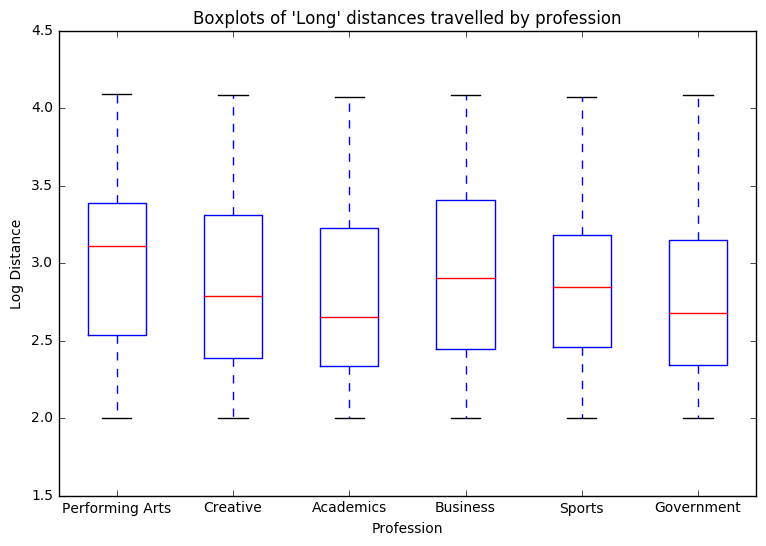

In [9]:
#boxplot for the long distance data by profession

appendedFiltered = appended.loc[appended['type'] == 'Long']
pa = appendedFiltered.loc[appendedFiltered['prof'] == 'Performing Arts']['logdist']
cr = appendedFiltered.loc[appendedFiltered['prof'] == 'Creative']['logdist']
ac = appendedFiltered.loc[appendedFiltered['prof'] == 'Academics']['logdist']
sp = appendedFiltered.loc[appendedFiltered['prof'] == 'Sports']['logdist']
go = appendedFiltered.loc[appendedFiltered['prof'] == 'Government']['logdist']
bu = appendedFiltered.loc[appendedFiltered['prof'] == 'Business']['logdist']

datatoplot = [pa,cr,ac,bu,sp,go]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(datatoplot)
ax.set_xticklabels(['Performing Arts', 'Creative', 'Academics', 'Business', 'Sports', 'Government'])
ax.set_ylim(1.5, 4.5)
ax.set_xlabel("Profession")
ax.set_ylabel("Log Distance")
ax.set_title("Boxplots of 'Long' distances travelled by profession")

plt.show()

In [5]:
#percentage of long and short distances for each profession
summary = appended.groupby(['prof','type']).size()
summarydf = pd.DataFrame(summary)
summarydf = summarydf.unstack(level=-1)
summarydf['prof'] = summarydf.index
summarydf = summarydf.reset_index(drop=True)
summarydf.columns = summarydf.columns.droplevel()
summarydf.columns = ['Long', 'Short', 'Prof']
summarydf['Longp'] = summarydf['Long'] /(summarydf['Long'] + summarydf['Short'])*100
summarydf['Shortp'] = summarydf['Short'] /(summarydf['Long'] + summarydf['Short'])*100

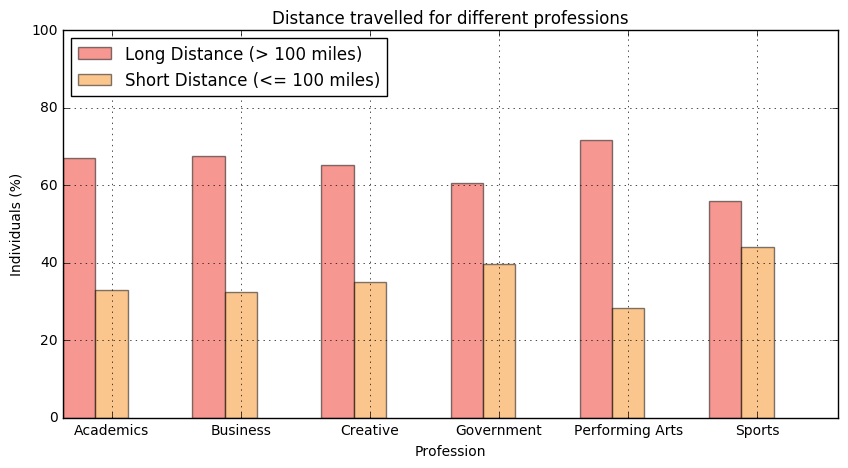

In [8]:
# creating the gouped bar chart
# Setting the positions and width for the bars
pos = list(range(len(summarydf['Longp'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with long distance data,
# in position pos,
plt.bar(pos,
        summarydf['Longp'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224',
        # with label the first value in first_name
        label=summarydf['Prof'][0])

# Create a bar with short distance data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        summarydf['Shortp'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E',
        # with label the second value in first_name
        label=summarydf['Prof'][1])

# Set the y axis label
ax.set_ylabel('Individuals (%)')

# Set the x axis label
ax.set_xlabel('Profession')

# Set the chart's title
ax.set_title('Distance travelled for different professions')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(summarydf['Prof'])

ax.set_ylim(0, 100)

# Adding the legend and showing the plot
plt.legend(['Long Distance (> 100 miles)', 'Short Distance (<= 100 miles)'], loc='upper left')
plt.grid()
plt.show()